In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime
import pandas_profiling

In [2]:
file = pd.read_csv('transactions_dataset.csv', sep=';')

# Dataset overview:

In [3]:
file.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051


In [4]:
file.describe()

,product_id,client_id,sales_net,quantity,branch_id
count,6.331932e+07,6.331932e+07,6.331932e+07,6.331932e+07,6.331932e+07
mean,1.632321e+06,1.139833e+06,1.479416e+02,9.215658e+01,5.466714e+03
std,9.184524e+05,6.552536e+05,8.646548e+02,8.674801e+02,3.175258e+03
min,1.500000e+01,6.000000e+00,-1.738817e+06,3.000000e+00,2.000000e+01
25%,8.517370e+05,5.658470e+05,1.414653e+01,3.000000e+00,2.907000e+03
50%,1.621731e+06,1.152241e+06,4.424280e+01,5.000000e+00,5.226000e+03
75%,2.434262e+06,1.706977e+06,1.314680e+02,2.100000e+01,8.361000e+03
max,3.238833e+06,2.274517e+06,1.740456e+06,1.980010e+05,1.105700e+04


In [5]:
file.columns

Index(['date_order', 'date_invoice', 'product_id', 'client_id', 'sales_net',
       'quantity', 'order_channel', 'branch_id'],
      dtype='object')

In [6]:
file['date_order'] = pd.to_datetime(file['date_order'])
file['date_order'] = pd.to_datetime(file['date_invoice'])
file['price'] = file['sales_net'] / file['quantity']

In [7]:
file['year'] = file.date_order.apply(lambda x: x.year)
file['month'] = file.date_order.apply(lambda x: x.month)
file['day'] = file.date_order.apply(lambda x: x.day)
file['hour'] = file.date_order.apply(lambda x: x.hour)

In [8]:
def get_season(y):
    if (y < 3) or (y == 12):
        return 'Winter' 
    elif (y >= 3) and (y <= 5):
        return 'Spring'
    elif (y >= 6) and (y <= 8):
        return 'Summer'
    elif (y >= 9) and (y <= 11) :
        return 'Fall'

In [9]:
file['season'] = file['month'].apply(get_season)

In [10]:
file['season'] = file.season.astype('category')

In [22]:
#pandas_profiling.ProfileReport(file)

# Product_ID / Price:
- Very evenly distributed, with a few outliers

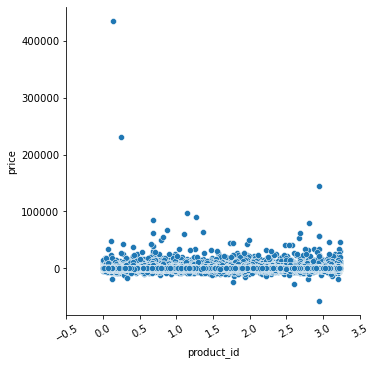

In [11]:
ax=sns.relplot(data=file, x="product_id", y='price')
ax.set_xticklabels(rotation=30)
plt.show()

# Order_Channel / Price:
- By Phone seems to be the channel with the highest price range of products, as well as having the cheapest and most expensive products. Sales rep visits have the lowest range. 

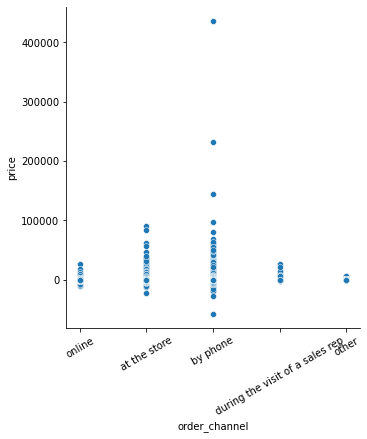

In [12]:
ax=sns.relplot(data=file, x="order_channel", y='price')
ax.set_xticklabels(rotation=30)
plt.show()

# Order_Channel / Quantity:
- By phone also has the higest range for quantity ordered

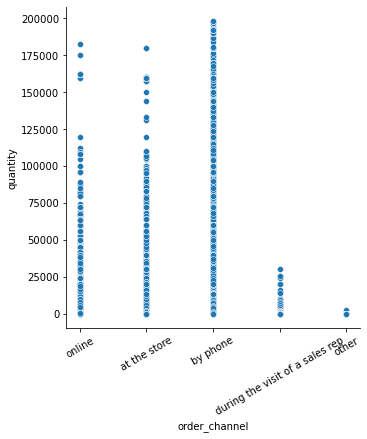

In [13]:
ax=sns.relplot(data=file, x="order_channel", y='quantity')
ax.set_xticklabels(rotation=30)
plt.show()

# Client_ID / Price:
- Evenly distributed, with few outliers

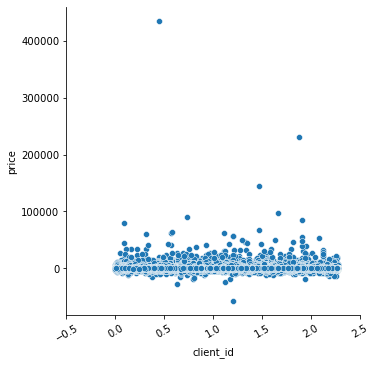

In [14]:
ax=sns.relplot(data=file, x="client_id", y='price')
ax.set_xticklabels(rotation=30)
plt.show()

# Quantity / Price:

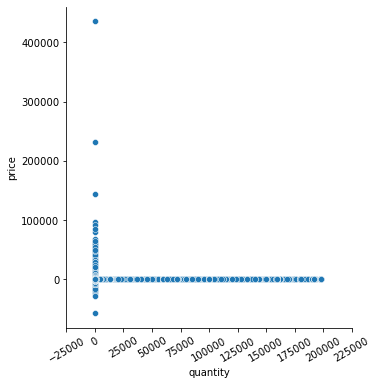

In [15]:
ax=sns.relplot(data=file, x="quantity", y='price')
ax.set_xticklabels(rotation=30)
plt.show()

# Branch_ID / Price:
- Evenly distributed, with few outliers

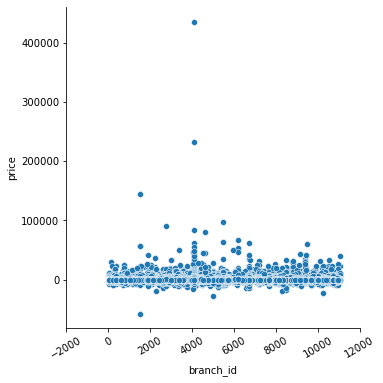

In [16]:
ax=sns.relplot(data=file, x="branch_id", y='price')
ax.set_xticklabels(rotation=30)
plt.show()

# Client_ID / Quantity:
- Most orders of clients seem to have a quantity of fewer than 100000 

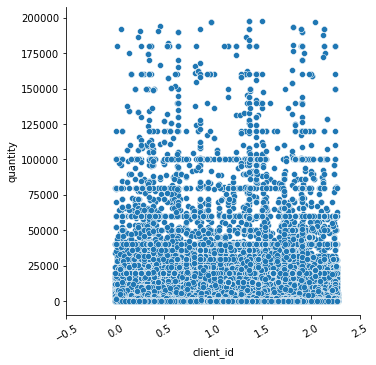

In [17]:
ax=sns.relplot(data=file, x="client_id", y='quantity')
ax.set_xticklabels(rotation=30)
plt.show()

# Client_ID / Product_ID:

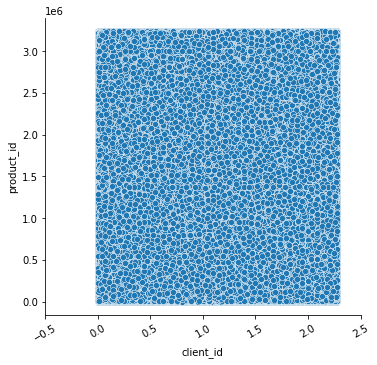

In [18]:
ax=sns.relplot(data=file, x="client_id", y='product_id')
ax.set_xticklabels(rotation=30)
plt.show()